In [1]:
import pandas as pd
import numpy as np
import re
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from wordcloud import WordCloud

import matplotlib.pyplot as plt
import seaborn as sns

from prepare import basic_clean_df, readme_length

import nltk
import unicodedata

In [2]:
df = pd.read_json('data.json')

In [3]:
df = basic_clean_df(df)

In [4]:
df

,language,readme_contents
0,java,development moved httpsgithubcomjasonellejason...
1,java,like project show support starring repository ...
2,java,circularimageview custom view circular image a...
3,java,android system ui training android uiforkstar...
4,java,tianti httpsyuedubaiducomebookaefafbdfbafetian...
...,...,...
145,python,convolutional neural network sentence classifi...
146,python,alexapi use new alexapi httpsgithubcomalexapia...
147,python,introduction hangupsbot chat bot designed work...
148,python,tool allows scan multiple host heartbleed effi...


In [5]:
df['readme_length'] = readme_length(df, 'readme_contents')

In [6]:
df.loc[9]

language                                                        java
readme_contents    blurredview dynamic blur image view android li...
readme_length                                                   1443
Name: 9, dtype: object

In [7]:
def train_val_test(df, stratify=False, target=None):
    train_validate, test = train_test_split(df,
                                            random_state=706,
                                            train_size=0.8,
                                            stratify=df[target] if stratify else None)
    train, val = train_test_split(train_validate,
                                  random_state=706,
                                  train_size=0.7,
                                  stratify=train_validate[target] if stratify else None)
    return train, val, test

In [8]:
train, val, test = train_val_test(df, stratify=True, target='language')

In [9]:
train['readme_length'] = readme_length(train, 'readme_contents')

In [10]:
train.shape, val.shape, test.shape

((84, 3), (36, 3), (30, 3))

In [11]:
train

,language,readme_contents,readme_length
142,python,realtime semantic segmentation comparative stu...,5403
9,java,blurredview dynamic blur image view android li...,1443
139,python,portugusreadmemd covidbr testdockerhttpsgithub...,9309
134,python,pivhttpsimgshieldsiopivjuternotifysvghttpspior...,3712
78,javascript,socialfeed jquery plugin show user feed popula...,5114
...,...,...,...
136,python,deprecated apiai python sdk apiai deprecated d...,1490
64,javascript,svginjector fast caching dynamic inline svg do...,4331
146,python,alexapi use new alexapi httpsgithubcomalexapia...,2835
24,java,currently maintenance i m afraid enough time ...,4473


In [12]:
def clean(text):
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english')
    text = (unicodedata.normalize('NFKD', text)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [13]:
python_words = clean(' '.join(train[train.language=='python']['readme_contents']))
java_words = clean(' '.join(train[train.language=='java']['readme_contents']))
java_script_words = clean(' '.join(train[train.language=='javascript']['readme_contents']))
all_words = clean(' '.join(train['readme_contents']))

In [14]:
python_freq = pd.Series(python_words).value_counts()
java_freq = pd.Series(java_words).value_counts()
java_script_freq = pd.Series(java_script_words).value_counts()
all_freq = pd.Series(all_words).value_counts()

In [15]:
word_counts = pd.concat([python_freq,java_freq, java_script_freq, all_freq], axis=1
         ).fillna(0
                 ).astype(int)
word_counts.columns = ['python','java', 'javascript','all']
word_counts.head()

,python,java,javascript,all
service,147,48,2,197
data,119,32,19,170
message,106,26,34,166
file,87,25,60,172
string,84,5,54,143


In [16]:
word_counts.sort_values('all', ascending=False).head()

,python,java,javascript,all
use,66,43,107,216
service,147,48,2,197
file,87,25,60,172
data,119,32,19,170
message,106,26,34,166


<AxesSubplot:>

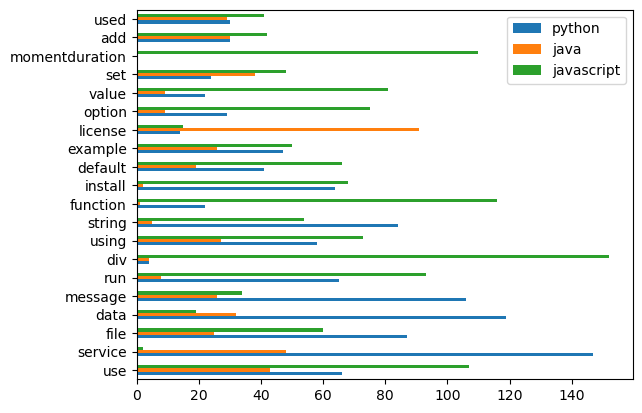

In [17]:
word_counts.sort_values('all', ascending=False
                       )[['python','java','javascript']].head(20).plot.barh()

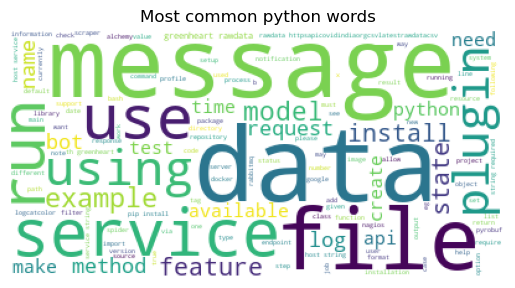

In [18]:
img = WordCloud(background_color='White',
         ).generate(' '.join(python_words))
plt.imshow(img)
plt.axis('off')
plt.title('Most common python words')
plt.show()

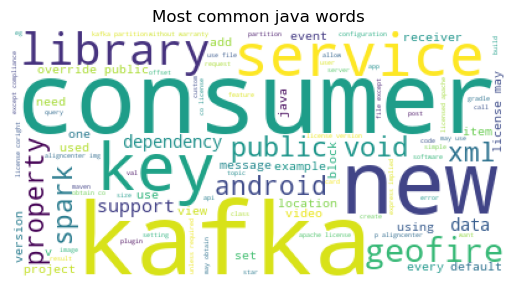

In [19]:
img = WordCloud(background_color='White',
         ).generate(' '.join(java_words))
plt.imshow(img)
plt.axis('off')
plt.title('Most common java words')
plt.show()

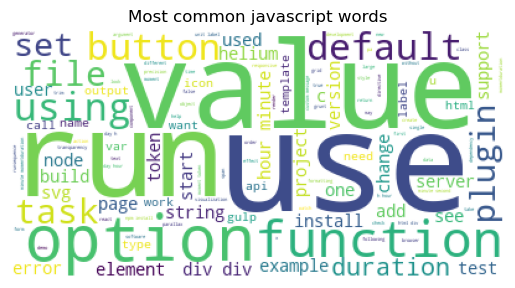

In [20]:
img = WordCloud(background_color='White',
         ).generate(' '.join(java_script_words))
plt.imshow(img)
plt.axis('off')
plt.title('Most common javascript words')
plt.show()

In [21]:
dif_words = [python_words, java_script_words, java_words]

In [22]:
titles = ['python', 'js', 'java']

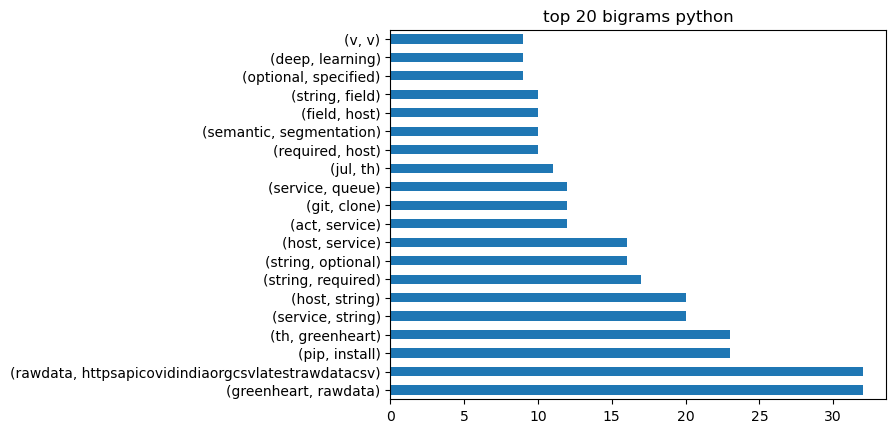

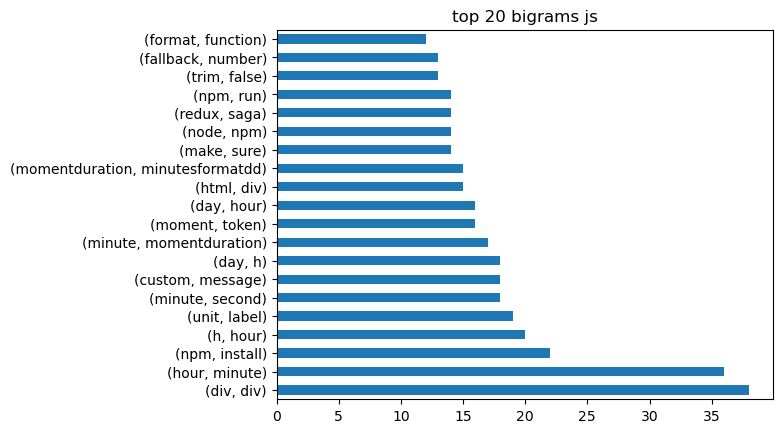

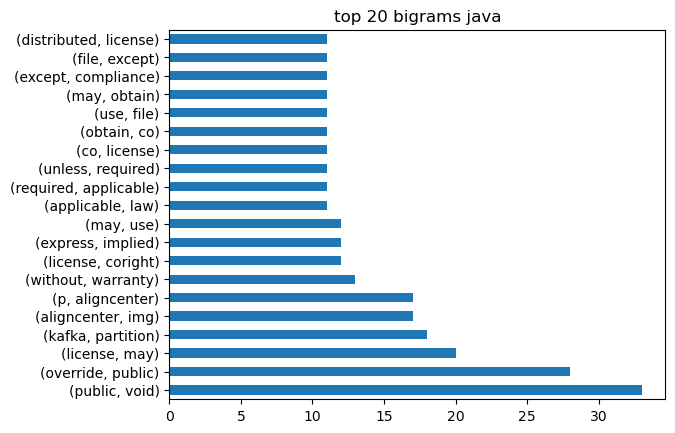

In [23]:
for i in range(3):
    pd.Series(nltk.bigrams(dif_words[i])).value_counts().head(20).plot.barh()
    plt.title(f'top 20 bigrams {titles[i]}')
    plt.show()

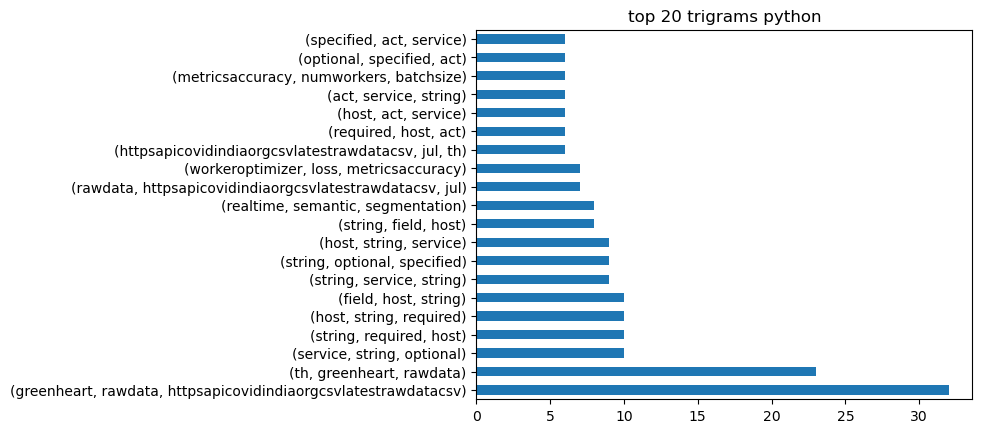

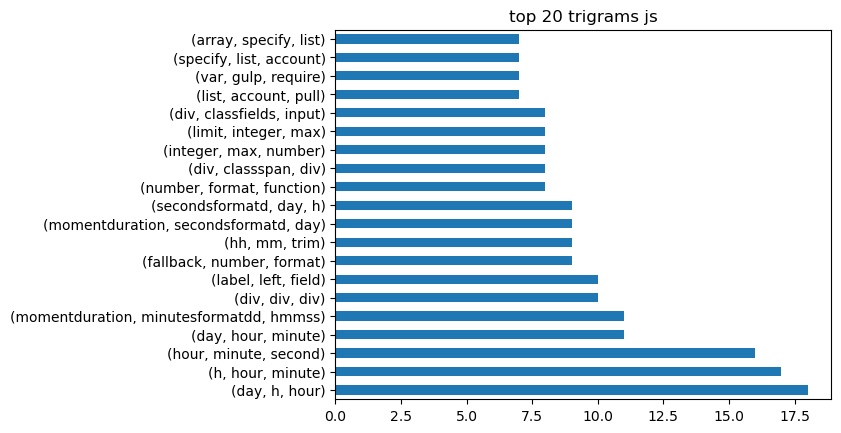

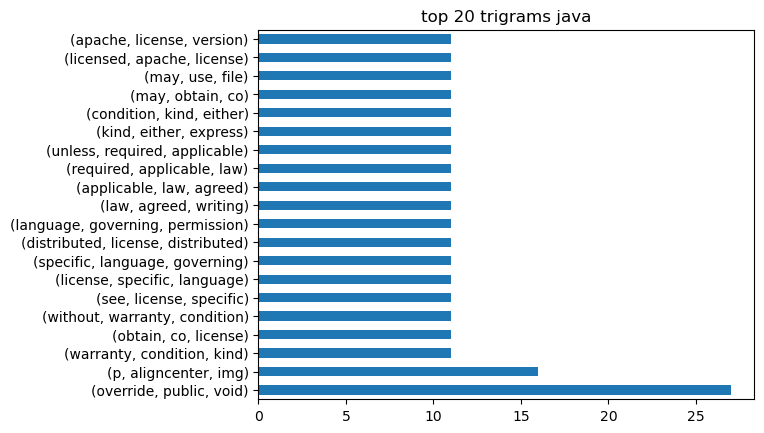

In [24]:
for i in range(3):
    pd.Series(nltk.ngrams(dif_words[i], 3)
             ).value_counts().head(20).plot.barh()
    plt.title(f'top 20 trigrams {titles[i]}')
    plt.show()

In [32]:
mean_py_wordCount = len(python_words) / 50

In [31]:
mean_java_wordCount = len(java_words) / 50

In [30]:
mean_javaScript_wordCount = len(java_script_words) / 50

In [33]:
train

,language,readme_contents,readme_length
142,python,realtime semantic segmentation comparative stu...,5403
9,java,blurredview dynamic blur image view android li...,1443
139,python,portugusreadmemd covidbr testdockerhttpsgithub...,9309
134,python,pivhttpsimgshieldsiopivjuternotifysvghttpspior...,3712
78,javascript,socialfeed jquery plugin show user feed popula...,5114
...,...,...,...
136,python,deprecated apiai python sdk apiai deprecated d...,1490
64,javascript,svginjector fast caching dynamic inline svg do...,4331
146,python,alexapi use new alexapi httpsgithubcomalexapia...,2835
24,java,currently maintenance i m afraid enough time ...,4473


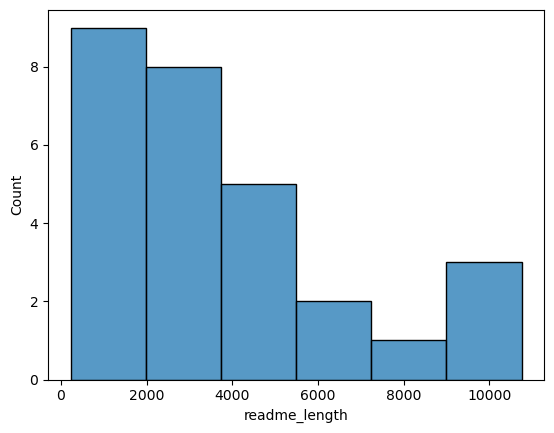

In [44]:
sns.histplot(train[train.language == 'python'].readme_length)
plt.show()

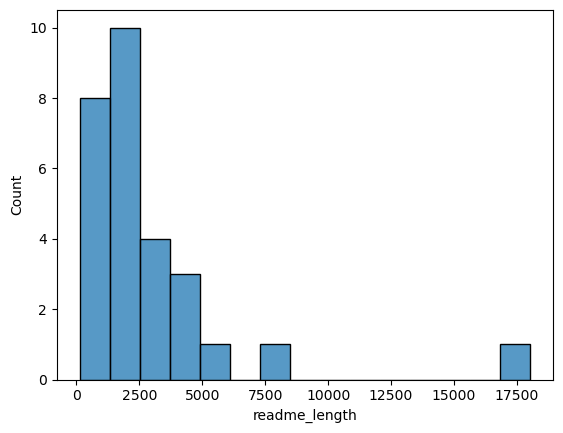

In [45]:
sns.histplot(train[train.language == 'java'].readme_length)
plt.show()

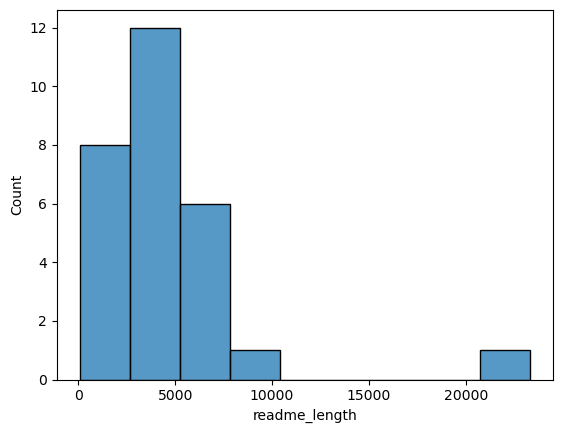

In [46]:
sns.histplot(train[train.language == 'javascript'].readme_length)
plt.show()